# Philomathia — Notebook principal

> Exécutez chaque cellule dans l’ordre. Les graphiques utilisent matplotlib.

In [35]:
# Imports de base
import numpy as np
import pandas as pd
import math, random, statistics
import matplotlib.pyplot as plt

# Pour un affichage net dans les notebooks
%matplotlib inline
print("Librairies chargées.")


Librairies chargées.


## 1) Vecteur & Matrice

In [36]:
# Vecteur (numpy array 1D)
v = np.array([2, -1, 3])
print("Vecteur v:", v)
print("Norme de v:", np.linalg.norm(v))

# Matrice (numpy array 2D)
M = np.array([[1, 2, 3],
              [4, 5, 6]])
print("\nMatrice M:\n", M)
print("Taille de M (lignes, colonnes):", M.shape)

# Produit matrice-vecteur
mv = M.dot(v)
print("\nProduit M·v:", mv)


Vecteur v: [ 2 -1  3]
Norme de v: 3.7416573867739413

Matrice M:
 [[1 2 3]
 [4 5 6]]
Taille de M (lignes, colonnes): (2, 3)

Produit M·v: [ 9 21]


## 2) Probabilité & loi (Bernoulli)

Fréquence observée de pile (≈0.5): 0.487


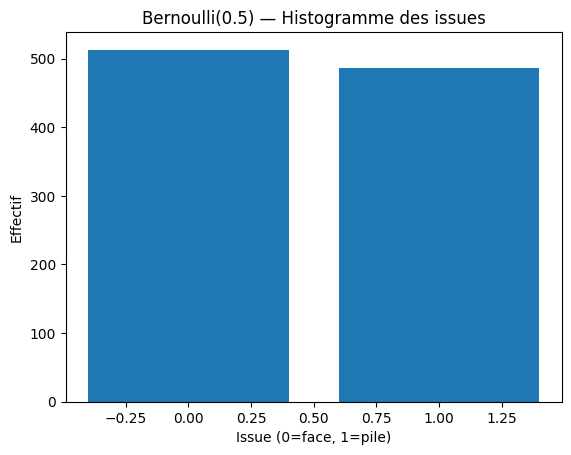

In [37]:
# Simulation : pile=1, face=0
n = 1000
tosses = np.random.binomial(n=1, p=0.5, size=n)
p_hat = tosses.mean()
print("Fréquence observée de pile (≈0.5):", p_hat)

# Histogramme des 0/1
plt.figure()
plt.hist(tosses, bins=[-0.5,0.5,1.5], rwidth=0.8)
plt.title("Bernoulli(0.5) — Histogramme des issues")
plt.xlabel("Issue (0=face, 1=pile)")
plt.ylabel("Effectif")
plt.show()


## 3) Variables indépendantes

In [38]:
# Lancer de deux pièces indépendantes
n = 10000
A = np.random.binomial(1, 0.5, size=n)  # 1=pile, 0=face
B = np.random.binomial(1, 0.5, size=n)

pA = A.mean()
pB = B.mean()
pAB = (A & B).mean()  # 1 uniquement si A=1 et B=1

print("P(A):", pA, "P(B):", pB, "P(A∩B):", pAB, "Produit P(A)P(B):", pA*pB)


P(A): 0.505 P(B): 0.4955 P(A∩B): 0.2476 Produit P(A)P(B): 0.2502275


## 4) Espérance, Variance, Écart-type

In [39]:
data = np.array([3, 5, 2, 9, 4, 7, 6, 8, 5, 4])
mean = data.mean()
var = data.var(ddof=0)          # variance population
std = data.std(ddof=0)          # écart-type population
print("Moyenne:", mean, "Variance:", var, "Écart-type:", std)


Moyenne: 5.3 Variance: 4.41 Écart-type: 2.1


## 5) Corrélation linéaire

Corrélation linéaire (≈0.8): 0.8506076399661268


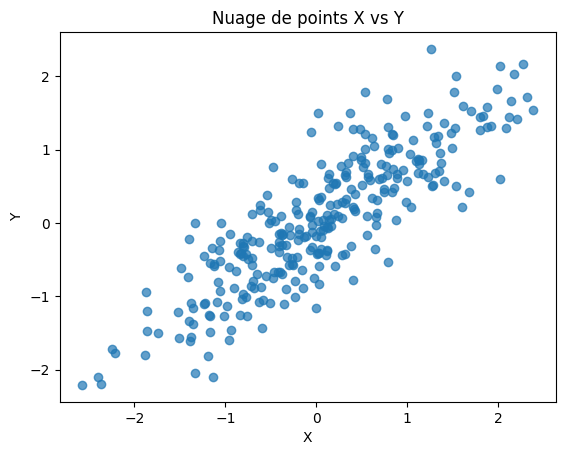

In [40]:
# X ~ N(0,1), Y = 0.8*X + bruit
n = 300
X = np.random.normal(0, 1, size=n)
noise = np.random.normal(0, 0.5, size=n)
Y = 0.8*X + noise

corr = np.corrcoef(X, Y)[0,1]
print("Corrélation linéaire (≈0.8):", corr)

plt.figure()
plt.scatter(X, Y, alpha=0.7)
plt.title("Nuage de points X vs Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


## 6) Moyenne, Médiane, Maximum, Minimum

In [41]:
data = np.array([12, 15, 14, 10, 18, 21, 9, 13, 16, 100])  # note: 100 est un outlier
print("Moyenne:", data.mean())
print("Médiane:", np.median(data))
print("Max:", data.max(), "Min:", data.min())


Moyenne: 22.8
Médiane: 14.5
Max: 100 Min: 9


## 7) Quartiles

In [42]:
data = np.array([12, 15, 14, 10, 18, 21, 9, 13, 16, 100])
q1, q2, q3 = np.percentile(data, [25, 50, 75])
iqr = q3 - q1
print("Q1:", q1, "Q2 (médiane):", q2, "Q3:", q3, "IQR:", iqr)


Q1: 12.25 Q2 (médiane): 14.5 Q3: 17.5 IQR: 5.25


## 8) Boxplot

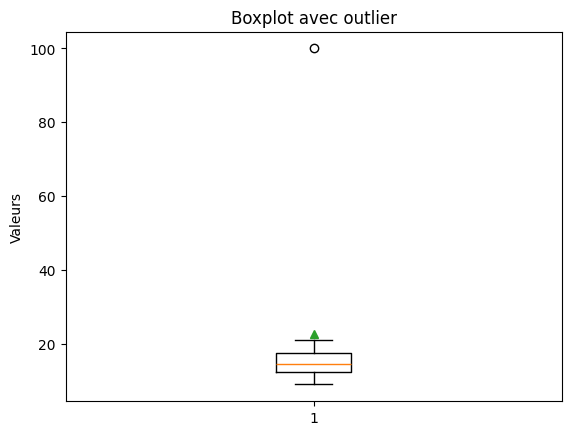

In [43]:
data = np.array([12, 15, 14, 10, 18, 21, 9, 13, 16, 100])
plt.figure()
plt.boxplot(data, vert=True, showmeans=True)
plt.title("Boxplot avec outlier")
plt.ylabel("Valeurs")
plt.show()


## 9) Histogramme

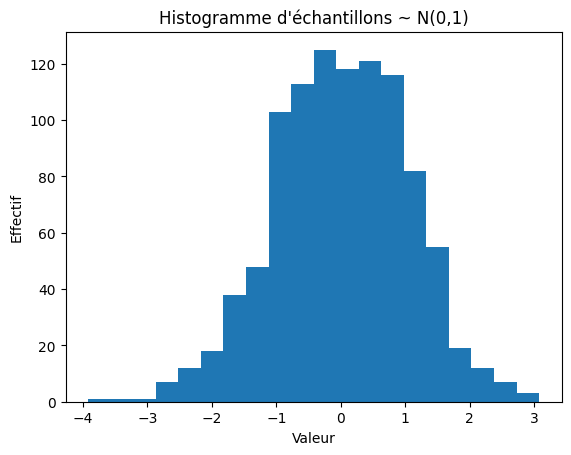

In [44]:
samples = np.random.normal(loc=0, scale=1, size=1000)
plt.figure()
plt.hist(samples, bins=20)
plt.title("Histogramme d'échantillons ~ N(0,1)")
plt.xlabel("Valeur")
plt.ylabel("Effectif")
plt.show()


## 10) Théorème Central Limite (simulation)

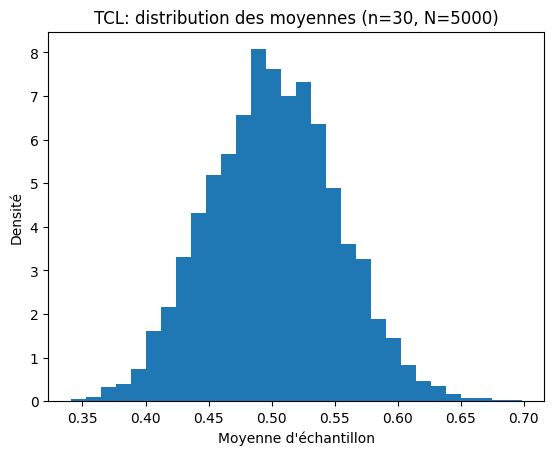

Moyenne des moyennes (≈0.5): 0.5014498865777576
Écart-type (≈ sqrt(1/12)/sqrt(n)): 0.05109193848998274


In [45]:
# Moyennes de n variables Uniforme[0,1], répétées N fois
N = 5000     # nombre de répétitions
n = 30       # taille d'échantillon
means = [np.mean(np.random.uniform(0,1,n)) for _ in range(N)]

plt.figure()
plt.hist(means, bins=30, density=True)
plt.title("TCL: distribution des moyennes (n=30, N=5000)")
plt.xlabel("Moyenne d'échantillon")
plt.ylabel("Densité")
plt.show()

print("Moyenne des moyennes (≈0.5):", np.mean(means))
print("Écart-type (≈ sqrt(1/12)/sqrt(n)):", np.std(means))


## 11) Dérivée (numérique et symbolique si disponible)

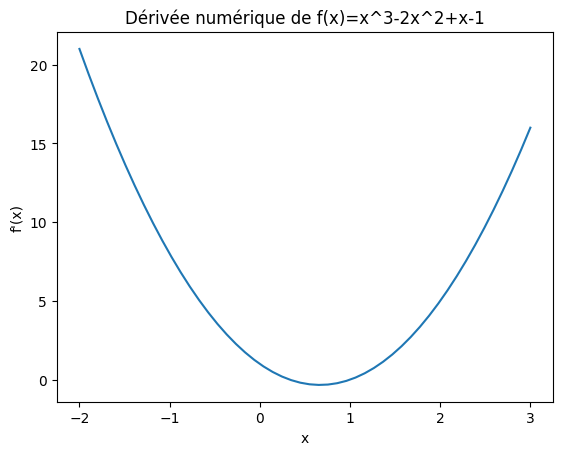

Dérivée symbolique: 3*x**2 - 4*x + 1


In [46]:
# Dérivée numérique simple par différences finies
def f(x):
    return x**3 - 2*x**2 + x - 1

def deriv_numeric(x, h=1e-5):
    return (f(x+h) - f(x-h)) / (2*h)

xs = np.linspace(-2, 3, 50)
yn = [deriv_numeric(x) for x in xs]

plt.figure()
plt.plot(xs, yn)
plt.title("Dérivée numérique de f(x)=x^3-2x^2+x-1")
plt.xlabel("x"); plt.ylabel("f'(x)")
plt.show()

# Essai symbolique (si sympy est installé)
try:
    import sympy as sp
    x = sp.symbols('x')
    expr = x**3 - 2*x**2 + x - 1
    dexpr = sp.diff(expr, x)
    print("Dérivée symbolique:", dexpr)
except Exception as e:
    print("Sympy non disponible — dérivée symbolique ignorée.")


> Fin du notebook — Revenez aux slides pour la synthèse.